We are interested in the loadings of the latent dimensions in the various integrated cell models. 

The variation in the latent dimensions for B-VAEs should vary on the task, whereas the latent dimensions in the AAE models should be uniform in variation

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA


model_dict = {'B-VAE': '/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-07-07-17:37:42',
             'B-VAEGAN': '/allen/aics/modeling/gregj/results/integrated_cell/test_bvaegan/2018-07-12-20:54:37',
             'AAEGAN': '/allen/aics/modeling/gregj/results/integrated_cell/test_aaegan/2018-07-13-22:33:39',
             'B-VAE 10': '/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-07-25-22:11:39'}


def plot_dim_variation(embeddings, legend_name = None):
    var_dims = np.sort(np.var(embeddings.numpy(), axis=0))[::-1]

    pca = PCA()
    pca.fit(embeddings)
    pca_var_dims = pca.singular_values_
    

    plt.subplot(2, 2, 1)
    plt.plot(var_dims, label=legend_name)
    plt.xlabel('dimension #')
    plt.ylabel('dimension variation')
    plt.ylim(0)

    plt.subplot(2, 2, 2)
    plt.plot(np.cumsum(var_dims)/np.sum(var_dims), label=legend_name)
    plt.xlabel('dimension #')
    plt.ylabel('cumulative variation')
    
    plt.subplot(2, 2, 3)
    plt.plot(pca_var_dims, label=legend_name)
    plt.xlabel('pc #')
    plt.ylabel('dimension variation')
    plt.ylim(0)

    plt.subplot(2, 2, 4)
    plt.plot(np.cumsum(pca_var_dims)/np.sum(pca_var_dims), label=legend_name)
    plt.xlabel('pc #')
    plt.ylabel('cumulative variation')
    plt.legend()
    
plt.figure(figsize=(8, 8))    

for name in model_dict:
    model_path = model_dict[name]
    embeddings = torch.load(os.path.join(model_path, 'ref_model/embeddings.pkl'))
    plot_dim_variation(embeddings['test'], legend_name = name)



FileNotFoundError: [Errno 2] No such file or directory: '/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-07-07-17:37:42/ref_model/embeddings.pkl'

<Figure size 576x576 with 0 Axes>

Results from integrated cell version of "Understanding disentangling in β-VAE"

We decrease the KL loss as a function of iteration

/allen/aics/modeling/gregj/results/integrated_cell/test_cbvae/2019-07-19-09:27:15
{'batch_size': 64, 'channels_pt1': [0, 1, 2], 'channels_pt2': [0, 1, 2], 'crit_decD': 'nn.BCEWithLogitsLoss', 'crit_encD': 'nn.BCEWithLogitsLoss', 'crit_recon': 'torch.nn.MSELoss', 'crit_z_class': 'torch.nn.NLLLoss', 'crit_z_ref': 'torch.nn.MSELoss', 'dataProvider': 'DataProvider', 'data_save_path': './test_cbvae/data_w_controls.pyt', 'dtype': 'float', 'gpu_ids': [0], 'hostname': 'dgx-aics-dcp-001', 'imdir': '/raid/shared/ipp/scp_19_04_10/', 'init_meth': 'normal', 'kwargs_crit_decD': None, 'kwargs_crit_encD': None, 'kwargs_crit_recon': {'reduction': 'sum'}, 'kwargs_crit_z_class': None, 'kwargs_dec': {'n_channels': 2, 'n_channels_target': 1, 'n_classes': 24, 'n_latent_dim': 512, 'n_ref': 512, 'output_padding': [1, 1], 'proj_z': 0, 'proj_z_ref_to_target': 0}, 'kwargs_decD': {}, 'kwargs_decD_optim': {'betas': [0.5, 0.999]}, 'kwargs_dec_optim': {'betas': [0.9, 0.999]}, 'kwargs_dp': {'check_files': 1, 'crop_to

/home/gregj/anaconda3/envs/pytorch_integrated_cell/lib/python3.6/site-packages/ipykernel_launcher.py:50: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


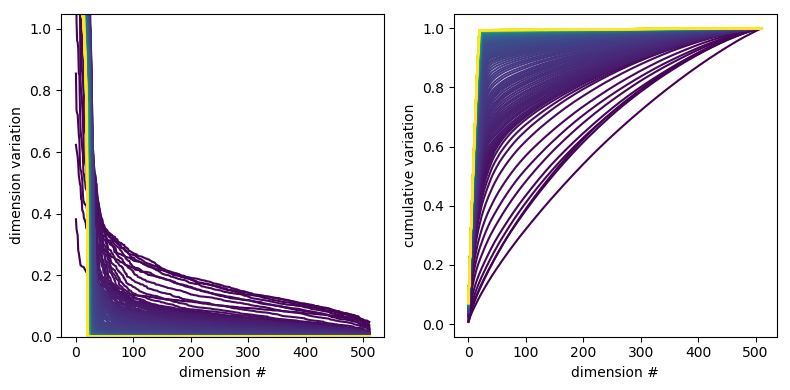

In [7]:
import pdb
import os
import glob
from natsort import natsorted
from integrated_cell.utils.plots import embedding_variation
import pickle
import json

from IPython.core.display import display
import PIL.Image
import scipy.misc as misc


# model_paths = glob.glob('/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvaegan/*/')
model_paths = natsorted(glob.glob('/allen/aics/modeling/gregj/results/integrated_cell/test_vaegan2D_proj/*/'))[::-1]
# model_paths = glob.glob('/root/allen/aics/modeling/gregj/results/integrated_cell/test_vaegan3D/*/')

# model_paths.sort(key=os.path.getmtime, reverse=True)

# model = 'struct_model'
model = 'ref_model'


model_paths = ['/allen/aics/modeling/gregj/results/integrated_cell/test_cbvae/2019-07-19-09:27:15']

model_paths = model_paths[0:25]

for i, model_path in enumerate(model_paths):
    embedding_paths = natsorted(glob.glob(os.path.join(model_path, model + '/embedding_*.pkl')))
    embedding_paths += natsorted(glob.glob(os.path.join(model_path, model + '/embedding_*.pth')))
    
    if len(embedding_paths) == 0: continue
#     opt = pickle.load( open(os.path.join(model_path, model + '/opt.pkl'), "rb" ))

    

    try:
        opt = pickle.load( open( '{0}/{1}/opt.pkl'.format(model_path, model), "rb" ))
    except:
        opt = json.load(open( '{0}/args.json'.format(model_path), "rb" ))

    print(model_path)
    print(opt)
    
    save_path = os.path.join(model_path, model + '/embedding_variation.png')

#     if not os.path.exists(save_path):
    embedding_variation(embedding_paths, save_path = save_path)
    
    im_embedding = misc.imread(save_path)        
    display(PIL.Image.fromarray(im_embedding))



In [2]:
model_paths.sort(key=os.path.getmtime, reverse=True)

In [9]:
model_paths = natsorted(glob.glob('/allen/aics/modeling/gregj/results/integrated_cell/test_vaegan2D_proj/*/'))
model_paths[::-1]

['/allen/aics/modeling/gregj/results/integrated_cell/test_vaegan2D_proj/2019-06-20-14:28:22/',
 '/allen/aics/modeling/gregj/results/integrated_cell/test_vaegan2D_proj/2019-06-20-14:07:39/',
 '/allen/aics/modeling/gregj/results/integrated_cell/test_vaegan2D_proj/2019-06-18-17:04:14/',
 '/allen/aics/modeling/gregj/results/integrated_cell/test_vaegan2D_proj/2019-06-18-15:41:21/',
 '/allen/aics/modeling/gregj/results/integrated_cell/test_vaegan2D_proj/2019-06-18-15:40:43/',
 '/allen/aics/modeling/gregj/results/integrated_cell/test_vaegan2D_proj/2019-06-18-15:40:10/',
 '/allen/aics/modeling/gregj/results/integrated_cell/test_vaegan2D_proj/2019-06-18-10:56:26/',
 '/allen/aics/modeling/gregj/results/integrated_cell/test_vaegan2D_proj/2019-06-18-10:55:08/',
 '/allen/aics/modeling/gregj/results/integrated_cell/test_vaegan2D_proj/2019-06-18-10:53:33/',
 '/allen/aics/modeling/gregj/results/integrated_cell/test_vaegan2D_proj/2019-06-13-10:55:56/',
 '/allen/aics/modeling/gregj/results/integrated_ce

In [25]:
import numpy as np
perm = np.random.permutation(5)
sort = np.argsort(perm)
np.arange(5)[perm][sort]

array([0, 1, 2, 3, 4])

In [26]:
torch.argsort

NameError: name 'torch' is not defined